# Creating a Dense Neural Network using Keras

This notebook uses the <b>Mobile Price Classification</b> data from Kaggle. You can access the files here: https://www.kaggle.com/iabhishekofficial/mobile-price-classification/data#.

The code was adapted from Sanchit Tanwar from Towards Data Science. His article can be found here: https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5.

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Load Dataset

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Data processing

In [4]:
# Convert from pandas dataframe to numpy array
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values

# Normalize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0],'\n')

# One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

# Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664] 

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


## Import Keras

Keras is a simple tool for constructing a neural network. It is a high-level framework based on tensorflow, theano or cntk backends.

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
# Feed forward neural network (2 hidden layers, 16-12)

model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In our dataset, the input is of 20 values and output is of 4 values. So the input and output layer is of 20 and 4 dimensions respectively.

<b>Sequential</b> specifies to keras that we are creating model sequentially and the output of each layer we add is input to the next layer we specify.</br>

<b>model.add</b> is used to add a layer to our neural network. We need to specify as an argument what type of layer we want.</br>

The Dense is used to specify the <b>fully connected layer</b>. The arguments of Dense are output dimension which is <b> 16</b> in the first case, input dimension which is 20 for input dimension and the activation function to be used which is relu in this case.
    
The second layer is similar, we dont need to specify input dimension as we have defined the model to be sequential so keras will automatically consider input dimension to be same as the output of last layer i.e 16. In the third layer(output layer) the output dimension is 4(number of classes). The output layer takes different activation functions and for the case of multiclass classification, it is softmax.

In [7]:
#To visualize neural network
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                336       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Specifying loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Categorical_crossentropy specifies that we have multiple classes. The optimizer is Adam. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

### Training our neural network

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)


Train on 1440 samples, validate on 360 samples
Epoch 1/100
1440/1440 [==============================] - 0s 179us/step - loss: 1.5348 - accuracy: 0.2653 - val_loss: 1.4680 - val_accuracy: 0.2444
Epoch 2/100
1440/1440 [==============================] - 0s 24us/step - loss: 1.4422 - accuracy: 0.2896 - val_loss: 1.4082 - val_accuracy: 0.2833
Epoch 3/100
1440/1440 [==============================] - 0s 21us/step - loss: 1.3882 - accuracy: 0.3201 - val_loss: 1.3736 - val_accuracy: 0.2889
Epoch 4/100
1440/1440 [==============================] - 0s 24us/step - loss: 1.3527 - accuracy: 0.3403 - val_loss: 1.3444 - val_accuracy: 0.3111
Epoch 5/100
1440/1440 [==============================] - 0s 21us/step - loss: 1.3176 - accuracy: 0.3736 - val_loss: 1.3111 - val_accuracy: 0.3472
Epoch 6/100
1440/1440 [==============================] - 0s 19us/step - loss: 1.2776 - accuracy: 0.4090 - val_loss: 1.2704 - val_accuracy: 0.3972
Epoch 7/100
1440/1440 [==============================] - 0s 19us/step - los

1440/1440 [==============================] - 0s 17us/step - loss: 0.1216 - accuracy: 0.9660 - val_loss: 0.2332 - val_accuracy: 0.8861
Epoch 56/100
1440/1440 [==============================] - 0s 17us/step - loss: 0.1187 - accuracy: 0.9681 - val_loss: 0.2324 - val_accuracy: 0.8972
Epoch 57/100
1440/1440 [==============================] - 0s 18us/step - loss: 0.1158 - accuracy: 0.9722 - val_loss: 0.2296 - val_accuracy: 0.8917
Epoch 58/100
1440/1440 [==============================] - 0s 18us/step - loss: 0.1132 - accuracy: 0.9729 - val_loss: 0.2298 - val_accuracy: 0.8944
Epoch 59/100
1440/1440 [==============================] - 0s 17us/step - loss: 0.1102 - accuracy: 0.9722 - val_loss: 0.2264 - val_accuracy: 0.8972
Epoch 60/100
1440/1440 [==============================] - 0s 17us/step - loss: 0.1070 - accuracy: 0.9729 - val_loss: 0.2263 - val_accuracy: 0.8889
Epoch 61/100
1440/1440 [==============================] - 0s 17us/step - loss: 0.1046 - accuracy: 0.9757 - val_loss: 0.2265 - val_a

Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the <b>history of model training</b>. History consists of model accuracy and losses after each epoch.

Here, I used a validation split of 80-20.

Usually, the dataset is very big and we cannot fit complete data at once so we use <b>batch size</b>. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is <b>flushed from memory</b> and the next batch will be processed.

### Check model's performance on test data

In [10]:
y_pred = model.predict(X_test)

#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [11]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [12]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 89.0


In [13]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0769 - accuracy: 0.9789 - val_loss: 0.1729 - val_accuracy: 0.9050
Epoch 2/100
1800/1800 [==============================] - 0s 16us/step - loss: 0.0723 - accuracy: 0.9800 - val_loss: 0.1930 - val_accuracy: 0.9000
Epoch 3/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0677 - accuracy: 0.9828 - val_loss: 0.1869 - val_accuracy: 0.9050
Epoch 4/100
1800/1800 [==============================] - 0s 16us/step - loss: 0.0644 - accuracy: 0.9839 - val_loss: 0.1843 - val_accuracy: 0.9100
Epoch 5/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0639 - accuracy: 0.9833 - val_loss: 0.1815 - val_accuracy: 0.8950
Epoch 6/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0610 - accuracy: 0.9844 - val_loss: 0.1755 - val_accuracy: 0.9050
Epoch 7/100
1800/1800 [==============================] - 0s 19us/step - loss:

1800/1800 [==============================] - 0s 19us/step - loss: 0.0207 - accuracy: 0.9994 - val_loss: 0.1872 - val_accuracy: 0.9100
Epoch 57/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0212 - accuracy: 0.9989 - val_loss: 0.1787 - val_accuracy: 0.9200
Epoch 58/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0202 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 0.9100
Epoch 59/100
1800/1800 [==============================] - 0s 16us/step - loss: 0.0201 - accuracy: 0.9994 - val_loss: 0.1743 - val_accuracy: 0.9100
Epoch 60/100
1800/1800 [==============================] - 0s 17us/step - loss: 0.0195 - accuracy: 0.9989 - val_loss: 0.1869 - val_accuracy: 0.9100
Epoch 61/100
1800/1800 [==============================] - 0s 16us/step - loss: 0.0191 - accuracy: 0.9989 - val_loss: 0.1818 - val_accuracy: 0.9100
Epoch 62/100
1800/1800 [==============================] - 0s 18us/step - loss: 0.0194 - accuracy: 0.9994 - val_loss: 0.1865 - val_a

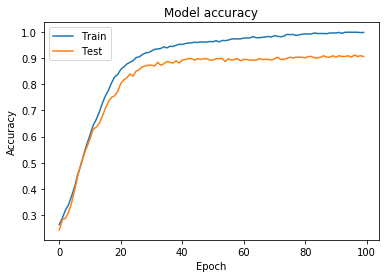

In [15]:
# Visualize training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

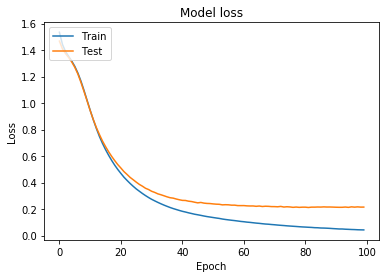

In [16]:
# Visualize training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()